In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install keras-self-attention

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras_self_attention import SeqSelfAttention, SeqWeightedAttention
from keras.initializers import GlorotNormal
import tensorflow as tf
from keras.regularizers import l2

In [4]:

# Load the dataset from the new directory path
alureon = pd.read_csv('/content/drive/MyDrive/ML/UMUDGA/alureon.csv')
banjori = pd.read_csv('/content/drive/MyDrive/ML/UMUDGA/banjori.csv')
bedep = pd.read_csv('/content/drive/MyDrive/ML/UMUDGA/bedep.csv')
ccleaner = pd.read_csv('/content/drive/MyDrive/ML/UMUDGA/ccleaner.csv')
chinad = pd.read_csv('/content/drive/MyDrive/ML/UMUDGA/chinad.csv')
corebot = pd.read_csv('/content/drive/MyDrive/ML/UMUDGA/corebot.csv')
cryptolocker = pd.read_csv('/content/drive/MyDrive/ML/UMUDGA/cryptolocker.csv')
dircrypt = pd.read_csv('/content/drive/MyDrive/ML/UMUDGA/dircrypt.csv')
dyre = pd.read_csv('/content/drive/MyDrive/ML/UMUDGA/dyre.csv')
fobber_v1 = pd.read_csv('/content/drive/MyDrive/ML/UMUDGA/fobber_v1.csv')
fobber_v2 = pd.read_csv('/content/drive/MyDrive/ML/UMUDGA/fobber_v2.csv')
gozi_gpl = pd.read_csv('/content/drive/MyDrive/ML/UMUDGA/gozi_gpl.csv')
gozi_luther = pd.read_csv('/content/drive/MyDrive/ML/UMUDGA/gozi_luther.csv')
gozi_nasa = pd.read_csv('/content/drive/MyDrive/ML/UMUDGA/gozi_nasa.csv')
gozi_rfc4343 = pd.read_csv('/content/drive/MyDrive/ML/UMUDGA/gozi_rfc4343.csv')
kraken_v1 = pd.read_csv('/content/drive/MyDrive/ML/UMUDGA/kraken_v1.csv')
kraken_v2 = pd.read_csv('/content/drive/MyDrive/ML/UMUDGA/kraken_v2.csv')
locky = pd.read_csv('/content/drive/MyDrive/ML/UMUDGA/locky.csv')
matsnu = pd.read_csv('/content/drive/MyDrive/ML/UMUDGA/matsnu.csv')
murofet_v1 = pd.read_csv('/content/drive/MyDrive/ML/UMUDGA/murofet_v1.csv')
murofet_v2 = pd.read_csv('/content/drive/MyDrive/ML/UMUDGA/murofet_v2.csv')
murofet_v3 = pd.read_csv('/content/drive/MyDrive/ML/UMUDGA/murofet_v3.csv')
necurs = pd.read_csv('/content/drive/MyDrive/ML/UMUDGA/necurs.csv')
nymaim = pd.read_csv('/content/drive/MyDrive/ML/UMUDGA/nymaim.csv')
padcrypt = pd.read_csv('/content/drive/MyDrive/ML/UMUDGA/padcrypt.csv')
pizd = pd.read_csv('/content/drive/MyDrive/ML/UMUDGA/pizd.csv')
proslikefan = pd.read_csv('/content/drive/MyDrive/ML/UMUDGA/proslikefan.csv')
pushdo = pd.read_csv('/content/drive/MyDrive/ML/UMUDGA/pushdo.csv')
pykspa = pd.read_csv('/content/drive/MyDrive/ML/UMUDGA/pykspa.csv')
pykspa_noise = pd.read_csv('/content/drive/MyDrive/ML/UMUDGA/pykspa_noise.csv')
qadars = pd.read_csv('/content/drive/MyDrive/ML/UMUDGA/qadars.csv')
qakbot = pd.read_csv('/content/drive/MyDrive/ML/UMUDGA/qakbot.csv')
ramdo = pd.read_csv('/content/drive/MyDrive/ML/UMUDGA/ramdo.csv')
ramnit = pd.read_csv('/content/drive/MyDrive/ML/UMUDGA/ramnit.csv')
ranbyus_v1 = pd.read_csv('/content/drive/MyDrive/ML/UMUDGA/ranbyus_v1.csv')
ranbyus_v2 = pd.read_csv('/content/drive/MyDrive/ML/UMUDGA/ranbyus_v2.csv')
rovnix = pd.read_csv('/content/drive/MyDrive/ML/UMUDGA/rovnix.csv')
shiotob = pd.read_csv('/content/drive/MyDrive/ML/UMUDGA/shiotob.csv')
simda = pd.read_csv('/content/drive/MyDrive/ML/UMUDGA/simda.csv')
sisron = pd.read_csv('/content/drive/MyDrive/ML/UMUDGA/sisron.csv')
suppobox_1 = pd.read_csv('/content/drive/MyDrive/ML/UMUDGA/suppobox_1.csv')
suppobox_2 = pd.read_csv('/content/drive/MyDrive/ML/UMUDGA/suppobox_2.csv')
suppobox_3 = pd.read_csv('/content/drive/MyDrive/ML/UMUDGA/suppobox_3.csv')
symmi = pd.read_csv('/content/drive/MyDrive/ML/UMUDGA/symmi.csv')
tempedreve = pd.read_csv('/content/drive/MyDrive/ML/UMUDGA/tempedreve.csv')
tinba = pd.read_csv('/content/drive/MyDrive/ML/UMUDGA/tinba.csv')
vawtrak_v1 = pd.read_csv('/content/drive/MyDrive/ML/UMUDGA/vawtrak_v1.csv')
vawtrak_v2 = pd.read_csv('/content/drive/MyDrive/ML/UMUDGA/vawtrak_v2.csv')
vawtrak_v3 = pd.read_csv('/content/drive/MyDrive/ML/UMUDGA/vawtrak_v3.csv')
zeus_newgoz = pd.read_csv('/content/drive/MyDrive/ML/UMUDGA/zeus-newgoz.csv')

# Concatenate all datasets into a single DataFrame
dataset = pd.concat([alureon, banjori, bedep, ccleaner, chinad, corebot, cryptolocker, dircrypt, dyre, fobber_v1,
                     fobber_v2, gozi_gpl, gozi_luther, gozi_nasa, gozi_rfc4343, kraken_v1, kraken_v2, locky, matsnu,
                     murofet_v1, murofet_v2, murofet_v3, necurs, nymaim, padcrypt, pizd, proslikefan, pushdo, pykspa,
                     pykspa_noise, qadars, qakbot, ramdo, ramnit, ranbyus_v1, ranbyus_v2, rovnix, shiotob, simda, sisron,
                     suppobox_1, suppobox_2, suppobox_3, symmi, tempedreve, tinba, vawtrak_v1, vawtrak_v2, vawtrak_v3,
                     zeus_newgoz], ignore_index=True)

# Print the shape of the dataset to verify
print(dataset.shape)


(49898, 134)


In [5]:
# Trộn dữ liệu trước khi mã hóa nhãn
shuffled_data = dataset.sample(frac=1, random_state=42).reset_index(drop=True)

# Định nghĩa một từ điển ánh xạ tùy chỉnh để đảm bảo thứ tự mong muốn mà không có lớp 'legit'
custom_mapping = {
    'alureon': 0,
    'padcrypt': 1,
    'proslikefan': 2,
    'pushdo': 3,
    'pykspa': 4,
    'pykspa_noise': 5,
    'qadars': 6,
    'qakbot': 7,
    'ramdo': 8,
    'ramnit': 9,
    'ranbyus_v1': 10,
    'ranbyus_v2': 11,
    'rovnix': 12,
    'shiotob': 13,
    'simda': 14,
    'sisron': 15,
    'suppobox_3': 16,
    'symmi': 17,
    'tempedreve': 18,
    'tinba': 19,
    'vawtrak_v1': 20,
    'vawtrak_v2': 21,
    'vawtrak_v3': 22,
    'banjori': 23,
    'zeus-newgoz': 24,
    'nymaim': 25,
    'necurs': 26,
    'bedep': 27,
    'ccleaner': 28,
    'chinad': 29,
    'corebot': 30,
    'cryptolocker': 31,
    'dircrypt': 32,
    'dyre': 33,
    'fobber_v1': 34,
    'fobber_v2': 35,
    'gozi_gpl': 36,
    'gozi_luther': 37,
    'kraken_v1': 38,
    'kraken_v2': 39,
    'locky': 40,
    'murofet_v1': 41,
    'murofet_v2': 42,
    'murofet_v3': 43,
    'suppobox_2': 44,
    'matsnu': 45,
    'gozi_rfc4343': 46,
    'gozi_nasa': 47,
    'suppobox_1': 48,
    'pizd': 49
}

# Các lớp duy nhất trước khi mã hóa nhãn
unique_classes_before_encoding = shuffled_data['class'].unique()
print("Unique classes before label encoding:", unique_classes_before_encoding)

# Áp dụng mã hóa nhãn bằng cách sử dụng ánh xạ tùy chỉnh
shuffled_data['class'] = shuffled_data['class'].map(custom_mapping)

# Mã hóa nhãn lớp
label_encoder = LabelEncoder()
shuffled_data['class'] = label_encoder.fit_transform(shuffled_data['class'])

# Các lớp duy nhất sau khi mã hóa nhãn
unique_classes_after_encoding = label_encoder.classes_
print("Unique classes after label encoding:", unique_classes_after_encoding)

# Định nghĩa một từ điển ánh xạ đảo ngược
reverse_mapping = {v: k for k, v in custom_mapping.items()}

# In ra số được gán cho mỗi lớp sau khi mã hóa nhãn
for class_number in unique_classes_after_encoding:
    class_name = reverse_mapping[class_number]
    print(f"Class: {class_name}, Encoded number: {class_number}")

Unique classes before label encoding: ['pizd' 'pushdo' 'ccleaner' 'qakbot' 'tinba' 'fobber_v1' 'tempedreve'
 'alureon' 'necurs' 'padcrypt' 'dircrypt' 'qadars' 'nymaim' 'kraken_v2'
 'bedep' 'fobber_v2' 'pykspa' 'murofet_v3' 'proslikefan' 'suppobox_2'
 'chinad' 'vawtrak_v2' 'ranbyus_v1' 'pykspa_noise' 'ramdo' 'sisron'
 'vawtrak_v1' 'ranbyus_v2' 'vawtrak_v3' 'kraken_v1' 'murofet_v2' 'matsnu'
 'locky' 'gozi_gpl' 'banjori' 'murofet_v1' 'corebot' 'gozi_luther'
 'cryptolocker' 'symmi' 'simda' 'dyre' 'gozi_nasa' 'ramnit' 'gozi_rfc4343'
 'zeus-newgoz' 'rovnix' 'suppobox_3' 'shiotob' 'suppobox_1']
Unique classes after label encoding: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
Class: alureon, Encoded number: 0
Class: padcrypt, Encoded number: 1
Class: proslikefan, Encoded number: 2
Class: pushdo, Encoded number: 3
Class: pykspa, Encoded number: 4
Class: pykspa_noise, Encoded number: 5
Cl

In [6]:
shuffled_data.head()

,domain,nlp_1g_25p,nlp_1g_50p,nlp_1g_75p,nlp_1g_cov,nlp_1g_dist,nlp_1g_dst_ca,nlp_1g_dst_ch,nlp_1g_dst_em,nlp_1g_dst_eu,...,nlp_r_num_odn,nlp_r_sym_2dn,nlp_r_sym_fqdn,nlp_r_sym_odn,nlp_r_vow_2dn,nlp_r_vow_fqdn,nlp_r_vow_odn,class,Unnamed: 132,nlp_lc_d
0,conditionpartial.net,0.0,0.0,0.052632,0.001484,11.0,32.731322,0.156771,8.844818,0.333663,...,0.0,0.0,0.050000,0.0,0.437500,0.400000,0.0,49,NaN,NaN
1,dekumaftefoz.kz,0.0,0.0,0.071429,0.001467,10.0,32.757755,0.141997,8.357229,0.344433,...,0.0,0.0,0.066667,0.0,0.416667,0.333333,0.0,3,NaN,NaN
2,ab1d673001015.com,0.0,0.0,0.062500,0.001406,12.0,30.650933,0.166028,5.996134,0.318175,...,0.0,0.0,0.058824,0.0,0.076923,0.117647,0.0,28,NaN,9.0
3,fnerbrdylnggf.net,0.0,0.0,0.062500,0.001539,10.0,33.749704,0.150316,9.275264,0.390471,...,0.0,0.0,0.058824,0.0,0.076923,0.117647,0.0,7,NaN,NaN
4,foeudgdenscn.com,0.0,0.0,0.066667,0.001458,10.0,33.253521,0.132473,10.856174,0.351970,...,0.0,0.0,0.062500,0.0,0.333333,0.312500,0.0,19,NaN,NaN


In [7]:
shuffled_data = shuffled_data.dropna(axis=1)

In [8]:
# Mã hóa tên miền
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(shuffled_data['domain'])
encoded_domain = tokenizer.texts_to_sequences(shuffled_data['domain'])

# In dữ liệu đã mã hóa và nhãn lớp
encoded_data_with_labels = pd.DataFrame({'Encoded Domain': encoded_domain, 'Encoded Class': shuffled_data['class']})
print(encoded_data_with_labels)

# Lấp đầy các chuỗi để đảm bảo độ dài đồng nhất
max_sequence_length = max([len(seq) for seq in encoded_domain])
padded_domain = pad_sequences(encoded_domain, maxlen=max_sequence_length)

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(padded_domain, shuffled_data['class'], test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Xác định kích thước từ vựng
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because index 0 is reserved
print(f"Vocab size: {vocab_size}")

                                          Encoded Domain  Encoded Class
0      [4, 1, 5, 12, 8, 6, 8, 1, 5, 19, 9, 10, 6, 8, ...             49
1      [12, 2, 18, 13, 7, 9, 16, 6, 2, 16, 1, 27, 3, ...              3
2      [9, 17, 28, 12, 33, 34, 31, 35, 35, 28, 35, 28...             28
3      [16, 5, 2, 10, 17, 10, 12, 22, 14, 5, 15, 15, ...              7
4      [16, 1, 2, 13, 12, 15, 12, 2, 5, 11, 4, 5, 3, ...             19
...                                                  ...            ...
49893  [9, 4, 23, 13, 8, 5, 6, 2, 6, 20, 2, 14, 9, 6,...             36
49894  [7, 18, 20, 22, 20, 8, 7, 2, 17, 8, 3, 8, 5, 1...             18
49895  [25, 13, 15, 13, 25, 13, 26, 22, 6, 2, 26, 3, ...             14
49896  [27, 13, 24, 22, 23, 19, 24, 2, 27, 5, 3, 4, 1...              0
49897  [16, 23, 26, 20, 11, 24, 11, 2, 24, 12, 22, 3,...             38

[49898 rows x 2 columns]
Shape of X_train: (39918, 47)
Shape of X_test: (9980, 47)
Shape of y_train: (39918,)
Shape of y_test: (9980,)


AB

In [10]:
!pip install scikeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 44.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.3.3 which is incompatible.


In [12]:
!pip install tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 8.4 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.3.3
    Uninstalling keras-3.3.3:
      Successfully uninstalled keras-3.3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikeras 0.13.0 requires keras>=3.2.0, but you have keras 2.15.0 which is incompatible.


In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Khởi tạo mô hình Sequential
model = Sequential()

# Thêm lớp ẩn với 100 nút và hàm kích hoạt ReLU
model.add(Dense(100, activation='relu', input_shape=(X_train.shape[1],)))

# Thêm lớp đầu ra với số nút bằng số lớp (giả sử đây là bài toán phân loại nhiều lớp)
# Ở đây sử dụng hàm softmax cho phân loại nhiều lớp
model.add(Dense(len(np.unique(y_train)), activation='softmax'))

# Biên dịch mô hình với bộ tối ưu hóa Adam, learning rate 0.001 và hàm mất mát categorical crossentropy
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Tính các chỉ số đo lường hiệu suất
accuracyNN = accuracy_score(y_test, y_pred_classes)
precisionNN = precision_score(y_test, y_pred_classes, average='weighted')
recallNN = recall_score(y_test, y_pred_classes, average='weighted')
f1NN = f1_score(y_test, y_pred_classes, average='weighted')

# In các chỉ số
print(f'Accuracy: {accuracyNN}')
print(f'Precision: {precisionNN}')
print(f'Recall: {recallNN}')
print(f'F1 Score: {f1NN}')


Epoch 1/10
1248/1248 [==============================] - 7s 5ms/step - loss: 2.4899 - accuracy: 0.3449 - val_loss: 1.7706 - val_accuracy: 0.4656
Epoch 2/10
1248/1248 [==============================] - 4s 3ms/step - loss: 1.6395 - accuracy: 0.4887 - val_loss: 1.5339 - val_accuracy: 0.5194
Epoch 3/10
1248/1248 [==============================] - 4s 3ms/step - loss: 1.4136 - accuracy: 0.5440 - val_loss: 1.3449 - val_accuracy: 0.5590
Epoch 4/10
1248/1248 [==============================] - 5s 4ms/step - loss: 1.2657 - accuracy: 0.5823 - val_loss: 1.2432 - val_accuracy: 0.5837
Epoch 5/10
1248/1248 [==============================] - 4s 3ms/step - loss: 1.1574 - accuracy: 0.6092 - val_loss: 1.1387 - val_accuracy: 0.6195
Epoch 6/10
1248/1248 [==============================] - 4s 3ms/step - loss: 1.0839 - accuracy: 0.6271 - val_loss: 1.0765 - val_accuracy: 0.6238
Epoch 7/10
1248/1248 [==============================] - 5s 4ms/step - loss: 1.0322 - accuracy: 0.6404 - val_loss: 1.0338 - val_accuracy:

In [ ]:
# Chọn kích thước nhúng
embedding_dim = 128

# Định nghĩa kiến trúc mô hình
model = Sequential()

# Thêm lớp nhúng với kích thước đầu vào, kích thước đầu ra và độ dài đầu vào
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))

# Thêm lớp LSTM đối xứng
model.add(Bidirectional(LSTM(units=128, return_sequences=True)))

# Thêm tự chú ý dãn dấu trình tự
model.add(SeqSelfAttention(attention_activation='sigmoid'))

# Thêm lớp dropout đầu tiên để tránh overfitting
model.add(Dropout(0.01))

# Thêm lớp LSTM đối xứng khác
model.add(Bidirectional(LSTM(units=128, return_sequences=True)))

# Thêm chú ý trọng số trình tự
model.add(SeqWeightedAttention())

# Thêm lớp dropout thứ hai để tránh overfitting
model.add(Dropout(0.01))

# Thêm lớp kích hoạt softmax cho việc phân loại nhiều lớp
model.add(Dense(units=len(label_encoder.classes_), activation='softmax'))

# Biên dịch mô hình
model.compile(optimizer=Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Tóm tắt mô hình
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 47, 128)           4992      
                                                                 
 bidirectional_20 (Bidirect  (None, 47, 256)           263168    
 ional)                                                          
                                                                 
 seq_self_attention_10 (Seq  (None, 47, 256)           16449     
 SelfAttention)                                                  
                                                                 
 dropout_20 (Dropout)        (None, 47, 256)           0         
                                                                 
 bidirectional_21 (Bidirect  (None, 47, 256)           394240    
 ional)                                                          
                                                     

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/10
312/312 [==============================] - 18s 30ms/step - loss: 2.0630 - accuracy: 0.3791 - val_loss: 1.0432 - val_accuracy: 0.6293
Epoch 2/10
312/312 [==============================] - 8s 26ms/step - loss: 0.8826 - accuracy: 0.6727 - val_loss: 0.7189 - val_accuracy: 0.7199
Epoch 3/10
312/312 [==============================] - 8s 25ms/step - loss: 0.6625 - accuracy: 0.7411 - val_loss: 0.5878 - val_accuracy: 0.7693
Epoch 4/10
312/312 [==============================] - 7s 24ms/step - loss: 0.5618 - accuracy: 0.7840 - val_loss: 0.5351 - val_accuracy: 0.7996
Epoch 5/10
312/312 [==============================] - 8s 26ms/step - loss: 0.5148 - accuracy: 0.7982 - val_loss: 0.4985 - val_accuracy: 0.8044
Epoch 6/10
312/312 [==============================] - 7s 23ms/step - loss: 0.4710 - accuracy: 0.8135 - val_loss: 0.4821 - val_accuracy: 0.8121
Epoch 7/10
312/312 [==============================] - 8s 24ms/step - loss: 0.4415 - accuracy: 0.8232 - val_loss: 0.4444 - val_accuracy: 0.825

In [ ]:
# Đánh giá mô hình trên tập test
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

312/312 [==============================] - 2s 7ms/step - loss: 0.4417 - accuracy: 0.8263
Test Loss: 0.4417288303375244
Test Accuracy: 0.8262525200843811


In [ ]:
model.save('/content/drive/MyDrive/DGA-model/la_mul07_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras_self_attention import SeqSelfAttention, SeqWeightedAttention
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Dự đoán các lớp cho tập kiểm tra
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


# Chuyển đổi các chỉ số lớp trở lại tên của chúng
target_names = [i for i in sorted(custom_mapping.keys())]

# Báo cáo phân loại
report = classification_report(y_test, y_pred_classes, target_names=target_names, output_dict=True)
print("Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=target_names))

# Precision, Recall, F1-Score trung bình theo micro và macro
micro_precision = precision_score(y_test, y_pred_classes, average='micro')
micro_recall = recall_score(y_test, y_pred_classes, average='micro')
micro_f1 = f1_score(y_test, y_pred_classes, average='micro')

macro_precision = precision_score(y_test, y_pred_classes, average='macro')
macro_recall = recall_score(y_test, y_pred_classes, average='macro')
macro_f1 = f1_score(y_test, y_pred_classes, average='macro')

print(f'Micro average Precision: {micro_precision}')
print(f'Micro average Recall: {micro_recall}')
print(f'Micro average F1-Score: {micro_f1}')
print(f'Macro average Precision: {macro_precision}')
print(f'Macro average Recall: {macro_recall}')
print(f'Macro average F1-Score: {macro_f1}')


312/312 [==============================] - 3s 6ms/step
Classification Report:
              precision    recall  f1-score   support

     alureon       0.39      0.65      0.49       195
     banjori       1.00      1.00      1.00       175
       bedep       0.77      0.63      0.69       202
    ccleaner       0.94      0.98      0.96       203
      chinad       0.53      0.08      0.14       195
     corebot       0.45      0.71      0.55       213
cryptolocker       0.96      0.94      0.95       199
    dircrypt       0.91      0.53      0.67       188
        dyre       1.00      1.00      1.00       190
   fobber_v1       0.33      0.60      0.42       169
   fobber_v2       0.83      0.81      0.82       209
    gozi_gpl       0.91      0.71      0.80       208
 gozi_luther       0.91      0.63      0.74       205
   gozi_nasa       0.92      0.91      0.92       208
gozi_rfc4343       0.95      1.00      0.97       206
   kraken_v1       1.00      1.00      1.00       206
   

In [10]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Khởi tạo mô hình cây quyết định yếu (weak learner)
weak_learner = DecisionTreeClassifier(max_depth=1)

# Khởi tạo mô hình AdaBoost với 50 cây quyết định và thuật toán SAMME.R
model = AdaBoostClassifier(
    estimator=weak_learner,
    n_estimators=50,
    algorithm='SAMME.R',
    random_state=42
)

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Tính các chỉ số đo lường hiệu suất
accuracyAB = accuracy_score(y_test, y_pred)
precisionAB = precision_score(y_test, y_pred, average='weighted')
recallAB = recall_score(y_test, y_pred, average='weighted')
f1AB = f1_score(y_test, y_pred, average='weighted')

# In các chỉ số
print(f'Accuracy: {accuracyAB}')
print(f'Precision: {precisionAB}')
print(f'Recall: {recallAB}')
print(f'F1 Score: {f1AB}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.03837675350701403
Precision: 0.010611998494257594
Recall: 0.03837675350701403
F1 Score: 0.014516310774136508


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [11]:
from sklearn.ensemble import RandomForestClassifier

# Khởi tạo mô hình RandomForest với các tham số cụ thể
rf_model = RandomForestClassifier(
    n_estimators=10,             # Số lượng cây
    max_features=5,              # Số lượng thuộc tính tối đa tại mỗi lần phân tách
    min_samples_split=5,         # Không phân tách các tập con nhỏ hơn 5
    random_state=42
)

# Huấn luyện mô hình
rf_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = rf_model.predict(X_test)

# Tính các chỉ số đo lường hiệu suất
accuracyRF = accuracy_score(y_test, y_pred)
precisionRF = precision_score(y_test, y_pred, average='weighted')
recallRF = recall_score(y_test, y_pred, average='weighted')
f1RF = f1_score(y_test, y_pred, average='weighted')

# In các chỉ số
print(f'Accuracy: {accuracyRF}')
print(f'Precision: {precisionRF}')
print(f'Recall: {recallRF}')
print(f'F1 Score: {f1RF}')

Accuracy: 0.7367735470941884
Precision: 0.7329807987842042
Recall: 0.7367735470941884
F1 Score: 0.7290397098417609


In [12]:
from sklearn.svm import SVC

# Khởi tạo mô hình SVM với các tham số cụ thể
svm_model = SVC(
    C=1.0,               # Tham số C
    kernel='rbf',        # Sử dụng RBF kernel
    gamma='scale',       # Sử dụng gamma='scale' theo mặc định của scikit-learn
    tol=0.10,            # Epsilon (E) = 0.10
    random_state=42
)

# Huấn luyện mô hình
svm_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = svm_model.predict(X_test)

# Tính các chỉ số đo lường hiệu suất
accuracySVM = accuracy_score(y_test, y_pred)
precisionSVM = precision_score(y_test, y_pred, average='weighted')
recallSVM = recall_score(y_test, y_pred, average='weighted')
f1SVM = f1_score(y_test, y_pred, average='weighted')

# In các chỉ số
print(f'Accuracy: {accuracySVM}')
print(f'Precision: {precisionSVM}')
print(f'Recall: {recallSVM}')
print(f'F1 Score: {f1SVM}')

Accuracy: 0.6216432865731463
Precision: 0.6191665046324859
Recall: 0.6216432865731463
F1 Score: 0.6033631255234206


In [13]:
from sklearn.tree import DecisionTreeClassifier

# Khởi tạo mô hình Decision Tree với các tham số cụ thể
dt_model = DecisionTreeClassifier(
    min_samples_leaf=2,      # Ít nhất hai mẫu trong các lá
    min_samples_split=5,     # Không chia nhỏ các cây nhỏ hơn năm
    max_depth=100,           # Độ sâu tối đa là 100
    max_leaf_nodes=None,     # Không giới hạn số lượng lá
    criterion='gini',        # Sử dụng tiêu chí Gini (có thể thay bằng 'entropy' nếu muốn)
    random_state=42
)

# Huấn luyện mô hình
dt_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = dt_model.predict(X_test)

# Tính các chỉ số đo lường hiệu suất
accuracyDT = accuracy_score(y_test, y_pred)
precisionDT = precision_score(y_test, y_pred, average='weighted')
recallDT = recall_score(y_test, y_pred, average='weighted')
f1DT = f1_score(y_test, y_pred, average='weighted')

# In các chỉ số
print(f'Accuracy: {accuracyDT}')
print(f'Precision: {precisionDT}')
print(f'Recall: {recallDT}')
print(f'F1 Score: {f1DT}')

Accuracy: 0.6879759519038077
Precision: 0.6920832474833587
Recall: 0.6879759519038077
F1 Score: 0.6882609619437386


In [14]:
from sklearn.neighbors import KNeighborsClassifier

# Khởi tạo mô hình k-Nearest Neighbours với các tham số cụ thể
knn_model = KNeighborsClassifier(
    n_neighbors=5,            # Sử dụng 5 hàng xóm
    metric='euclidean',       # Sử dụng khoảng cách Euclidean
    weights='uniform'         # Sử dụng trọng số đồng nhất
)

# Huấn luyện mô hình
knn_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = knn_model.predict(X_test)

# Tính các chỉ số đo lường hiệu suất
accuracyKN = accuracy_score(y_test, y_pred)
precisionKN = precision_score(y_test, y_pred, average='weighted')
recallKN = recall_score(y_test, y_pred, average='weighted')
f1KN = f1_score(y_test, y_pred, average='weighted')

# In các chỉ số
print(f'Accuracy: {accuracyKN}')
print(f'Precision: {precisionKN}')
print(f'Recall: {recallKN}')
print(f'F1 Score: {f1KN}')

Accuracy: 0.515130260521042
Precision: 0.5145679456230515
Recall: 0.515130260521042
F1 Score: 0.49572951703601553


In [18]:
LA_Mul07 = {
    'Model': ['La_Mul07'],
    'Accuracy': 0.82,
    'Precision': 0.84,
    'Recall': 0.83,
    'F1 Score': 0.82
}

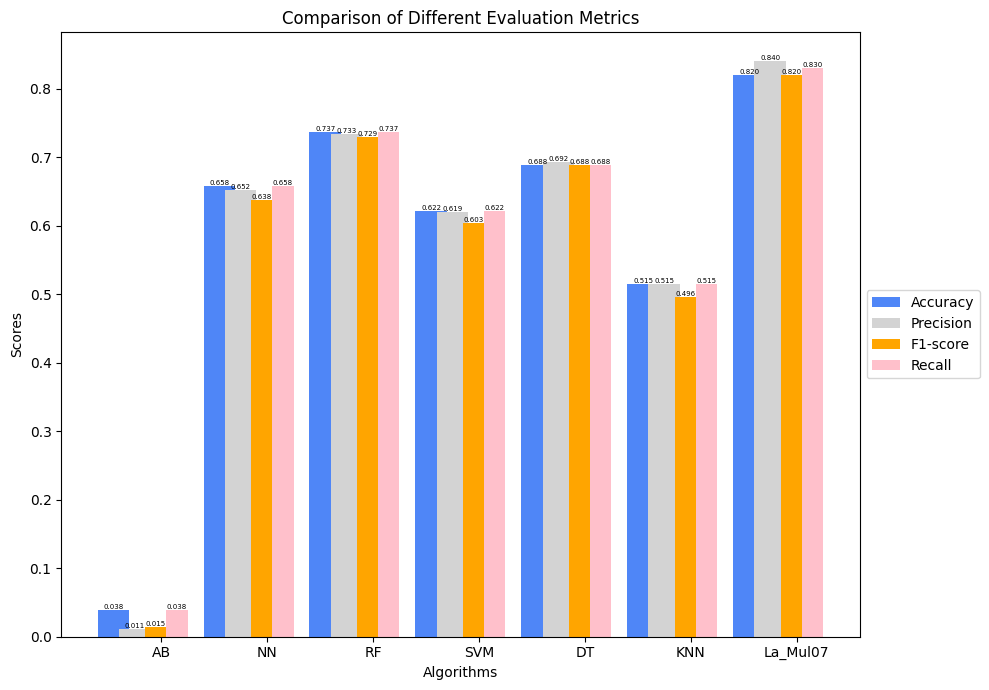

In [21]:
import matplotlib.pyplot as plt

# Chỉ số của các thuật toán
accuracies = [accuracyAB, accuracyNN, accuracyRF, accuracySVM, accuracyDT, accuracyKN, LA_Mul07['Accuracy']]
precisions = [precisionAB, precisionNN, precisionRF, precisionSVM, precisionDT, precisionKN, LA_Mul07['Precision']]
f1_scores = [f1AB, f1NN, f1RF, f1SVM, f1DT, f1KN, LA_Mul07['F1 Score']]
recalls = [recallAB, recallNN, recallRF, recallSVM, recallDT, recallKN, LA_Mul07['Recall']]

# Tên của các thuật toán
labels = ['AB', 'NN', 'RF', 'SVM', 'DT', 'KNN', 'La_Mul07']
colors = ['#4F86F7', '#D3D3D3', '#FFA500', '#FFC0CB']

# Vẽ biểu đồ cột
x = range(len(labels))
width = 0.3  # Độ rộng của các cột

plt.figure(figsize=(10, 7))

bars1 = plt.bar(x, accuracies, width=width, label='Accuracy', color=colors[0])
bars2 = plt.bar([i + 0.2 for i in x], precisions, width=width, label='Precision', color=colors[1])
bars3 = plt.bar([i + 0.4 for i in x], f1_scores, width=0.2, label='F1-score', color=colors[2])
bars4 = plt.bar([i + 0.6 for i in x], recalls, width=0.2, label='Recall', color=colors[3])

# Thêm số ở đầu mỗi cột với 3 chữ số thập phân không làm tròn
for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.3f}', ha='center', va='bottom', fontsize=5)

plt.xlabel('Algorithms')
plt.ylabel('Scores')
plt.title('Comparison of Different Evaluation Metrics')
plt.xticks([i + 0.45 for i in x], labels)

# Đặt legend ở ngoài plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()  # Tự động điều chỉnh các yếu tố để phù hợp với vùng vẽ
plt.show()